<a href="https://colab.research.google.com/github/Sangh0/DeepLearning-Tutorial/blob/main/current_materials/linear_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network 실습 전 개념 잡기
- scikit-learn으로 선형 회귀 및 선형 분류 모델 구축

### 강의 목표
- numpy, scikit-learn, matplotlib 패키지 사용법 파악
- 선형 회귀 기초 파악
- 시각화를 통해 모델 동작 이해

In [ ]:
# 필요 패키지 및 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt

### Goal
- 데이터가 주어질 때 데이터를 가장 잘 표현할 수 있는 선형 방정식을 찾아내는 것

In [ ]:
a = np.random.randn(4)
a

array([ 0.80764976,  0.61071707, -0.89299099, -2.44754849])

In [ ]:
# 선형 데이터 생성
# np.random.randn : 평균 0, 편차 1인 정규 분포표 난수 생성
# np.random.rand : 0~1 사이의 값을 가지는 난수 생성

# train 데이터
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1) #rand normal(정규분포), 100차원

# test 데이터
X_test = 2 * np.random.rand(30,1) # 20차원, 벡터같이 생긴 행렬
y_test = 4 + 3 * X_test + np.random.randn(30, 1)

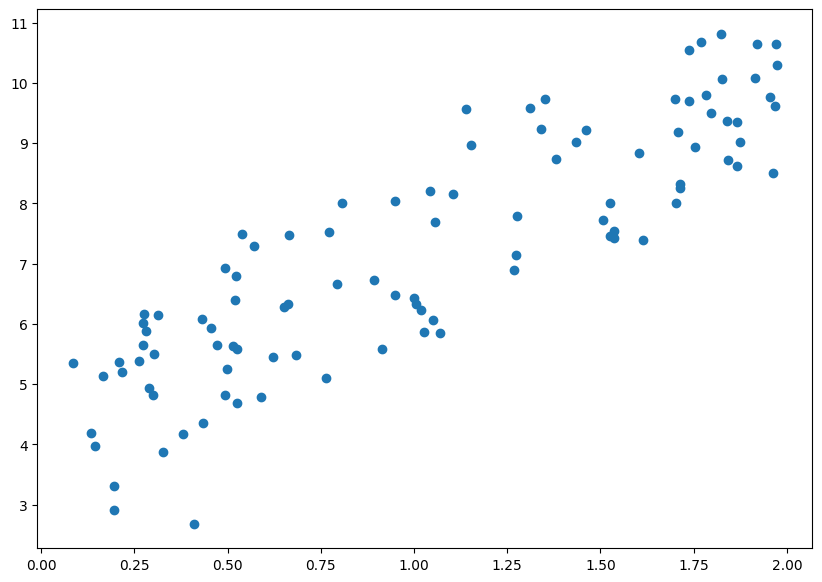

In [ ]:
# train 데이터 scatter 시각화

# figure 사이즈는 (10, 7)로 지정
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train) # x축, y축
plt.show() # figure 보여주기

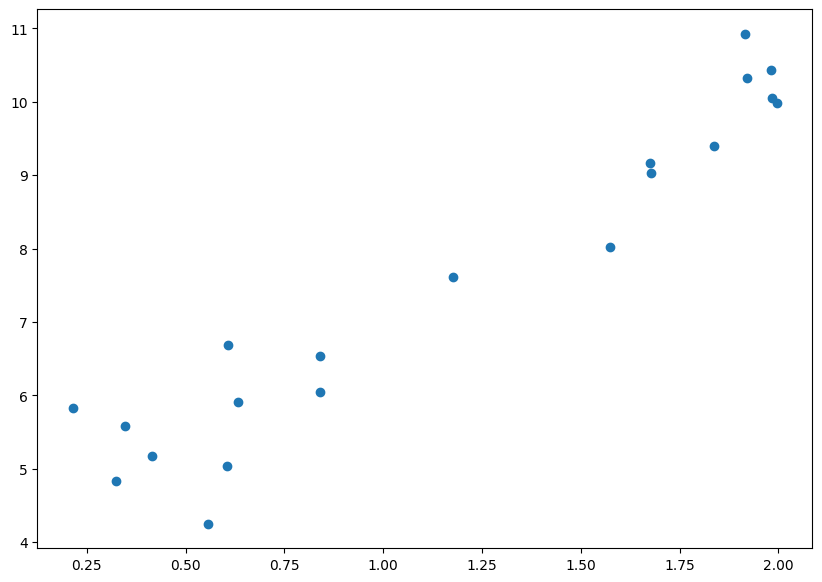

In [ ]:
# test 데이터 scatter 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test)
plt.show()

In [ ]:
# 모델 생성

# scikit-learn 패키지에 있는 LinearRegression 클래스 임포트하기
from sklearn.linear_model import LinearRegression

# Linear Regression 객체를 model이라고 정의
model = LinearRegression()
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# weight(기울기) 및 bias(y 절편) 구하기
bias, weight = model.intercept_, model.coef_[0]

print('기울기: ', weight)
print('y 절편: ', bias)

기울기:  [2.86152556]
y 절편:  [4.23487043]


In [ ]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

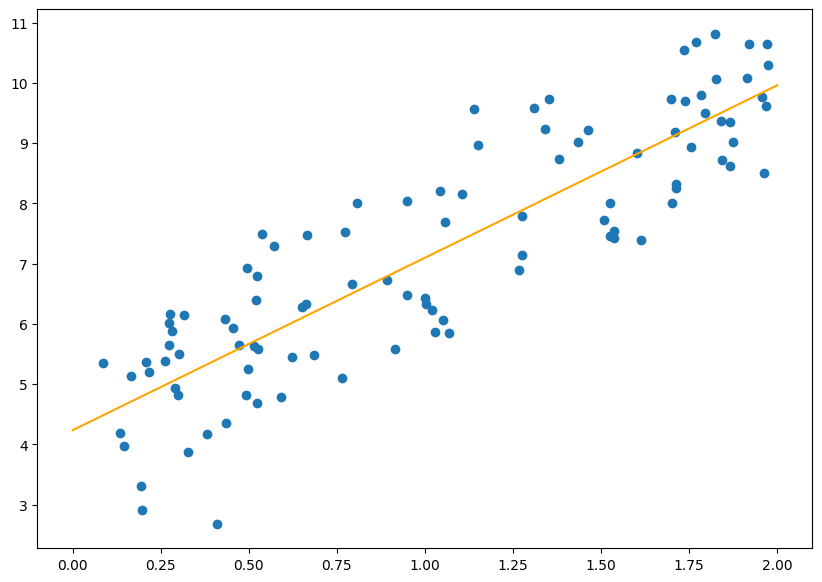

In [ ]:
# 모델이 생성한 선형 회귀 방정식이 train data에 대해 잘 나타내었는지 확인
sample = np.linspace(0, 2, 100) # 0~2 사이의

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train) # 점 시각화
plt.plot(sample, weight * sample + bias, color='orange') # 직선 시각화
plt.show()

- 따라서 모델이 생성한 선형회귀 방정식은 다음과 같이 나타낼 수 있음
$$Model\,\,Equation: y = wx + b$$

In [ ]:
# test 데이터에 대해 predict 진행
output = model.predict(X_test)

- Loss function은 MAE(Mean Absolute Error)로 설정
$$Loss\,\,function: MAE=\frac{1}{n}\sum_{i=1}^n\vert y_{pred}-y_{label}\vert$$

In [ ]:
# loss function 만들기 (mean absolute error)
def mae(output, target):
    loss = np.abs(output - target)
    loss = loss.sum()
    loss = loss / len(output)
    return loss

# 아니면 다음과 같이 정의할 수 있음
mae2 = lambda output, target: np.abs(output - target).sum() / len(output)

# loss 구하기
print('mae : ', mae(output, y_test))

mae :  0.6354100227404713


- RMSE(Root Mean Squared Error)로도 설정 가능
$$RMSE = \sqrt {\frac{1}{n} \sum_{i=1}^n \left(y_{pred} - y_{label}\right)^2 }$$

In [ ]:
# RMSE 구현
def rmse(output, target):
    loss = (output - target) ** 2
    loss = loss.sum() / len(output)
    loss = np.sqrt(loss)
    return loss

print('rmse :', rmse(output, y_test))

rmse : 0.7879679470105146


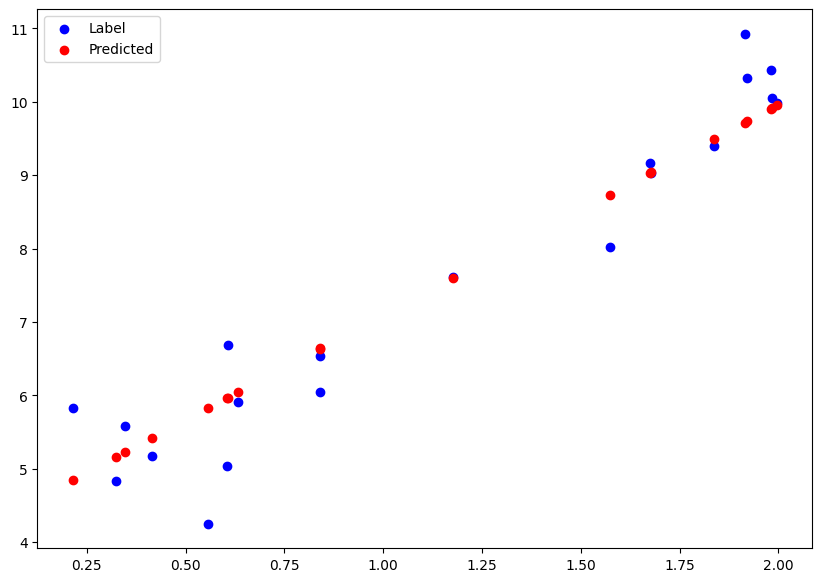

In [ ]:
# predicted와 label 비교
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, label='Label', color='blue')
plt.scatter(X_test, output, label='Predicted', color='red')
plt.legend(loc='best')
plt.show()

## Linear Classification
- Goal: 여러 클래스의 데이터가 주어지면 이 클래스들을 구별할 수 있는 분류 경계를 찾는 것

In [ ]:
np.array([[1, 2, 3],
          [2, 3, 4]])

array([[1, 2, 3],
       [2, 3, 4]])

In [ ]:
# 데이터 생성
X_train = np.array([[0.2, 0.4], [0.4, 0.2], [0.65, 0.3],  # class 1
                    [0.8, 0.5], [0.5, 0.8], [0.25, 0.8]]) # class 2
y_train = np.array([[0], [0], [0],   # class 1
                    [1], [1], [1]])  # class 2

print(X_train)
print(y_train)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


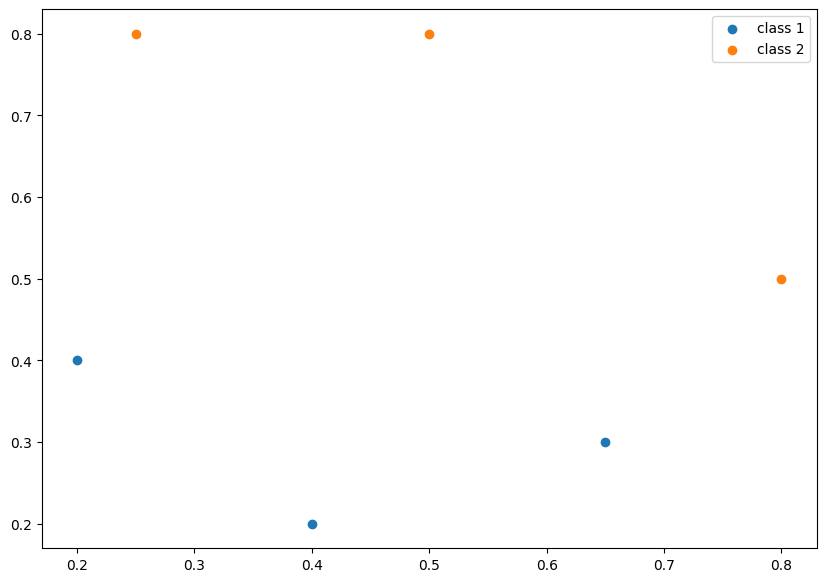

In [ ]:
# 데이터 분포 시각화
plt.figure(figsize=(10, 7)) # figure 사이즈 지정
plt.scatter(X_train[:3, 0], X_train[:3, 1], label='class 1') # class 1 좌표 시각화
plt.scatter(X_train[3:, 0], X_train[3:, 1], label='class 2') # class 2 좌표 시각화
plt.legend(loc='best') # 그래프 범례 위치는 알아서 best인 곳에 지정
plt.show()

In [ ]:
# 모델 학습
from sklearn.linear_model import SGDClassifier

# iteration 100 모델
model = SGDClassifier(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=100)

In [ ]:
# train data에 대해 모델의 정확도 체크
train_acc = model.score(X_train, y_train)
print('accuracy of training 1 :', train_acc * 100, '%')

accuracy of training 1 : 100.0 %


In [ ]:
# weight 및 bias 구하기
weight11, weight21 = model.coef_[0]
bias1 = model.intercept_
print('weight 11:', weight11)
print('weight 21:', weight21)
print('bias 1:', bias1)

weight 11: 4.249291784702545
weight 21: 15.108593012275726
bias 1: [-9.85280483]


## weight들과 bias를 가지고 decision boundary 그리기
- $n$차원 공간에 있는 데이터 사이의 decision boundary는 $n-1$차원
- 즉, 2차원 공간에 있는 데이터 사이 decision boundary는 1차원 즉, line
- 이 예제에서 사용한 데이터는 2차원
- 따라서 이에 맞춰 식을 변경할 필요가 있음
- 위의 데이터 정의에 의해 $x$축은 $w_1$에 해당, $y$축은 $w_2$에 해당

$$decision\,\,boundary: w_1 x_1 + w_2 x_2 + b = 0$$

- $x_2$에 대한 식으로 표현하면
$$\Rightarrow x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$$

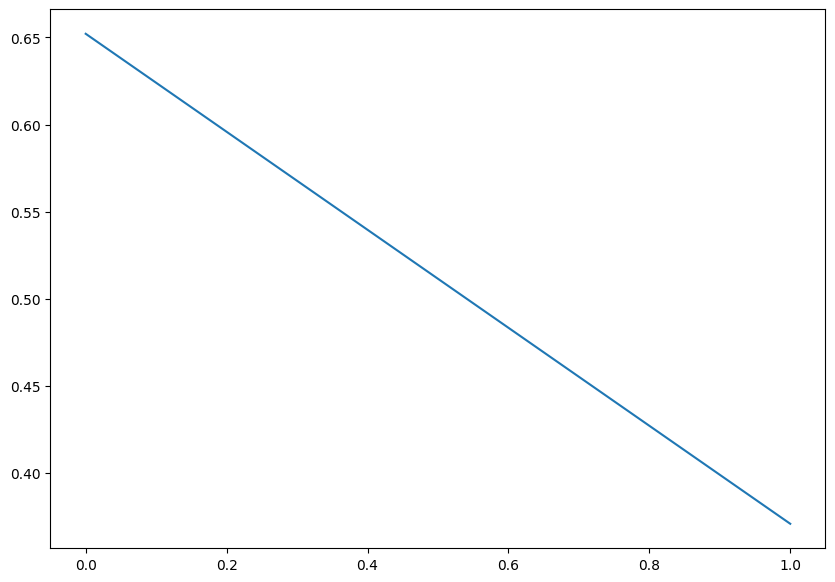

In [ ]:
# 결정 경계선
x1 = np.linspace(0, 1, 100)
x2 = (- weight11 / weight21) * x1 - (bias1 / weight21)

plt.figure(figsize=(10, 7))
plt.plot(x1, x2)
plt.show()

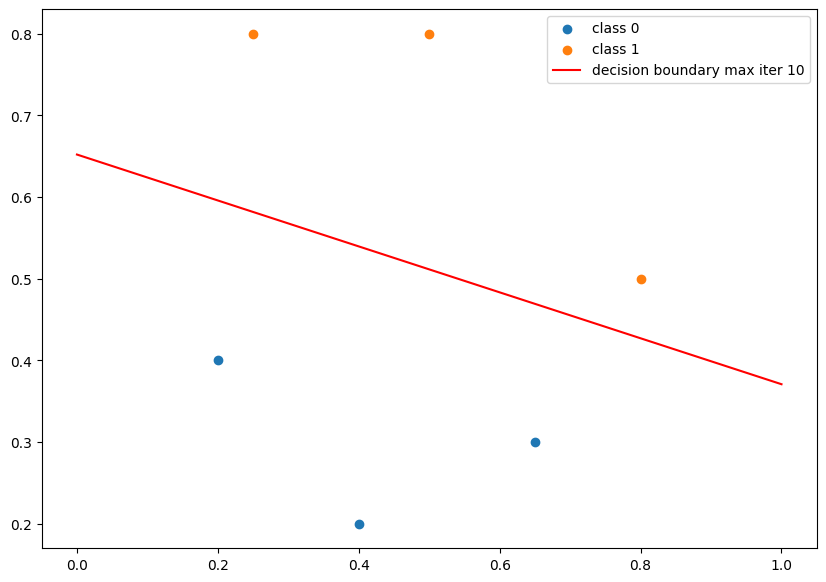

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:3, 0], X_train[:3, 1], label='class 0')
plt.scatter(X_train[3:, 0], X_train[3:, 1], label='class 1')
plt.plot(x1, x2, label='decision boundary max iter 10', color='red')
plt.legend(loc='best')
plt.show()